In [13]:
import pandas as pd
import ast
from datasets  import load_dataset
import  matplotlib.pyplot   as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Only get Data Anayst jobs in the US
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'United States')].copy()


In [14]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg']

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

<Axes: >

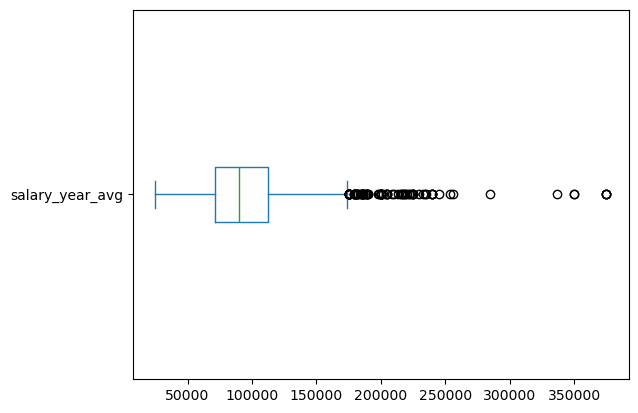

In [15]:
df_DA_US['salary_year_avg'].plot(kind='box' , vert=False)

C:\Users\Sarki\AppData\Local\Temp\ipykernel_15696\3337099042.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels= job_titles, vert=False)


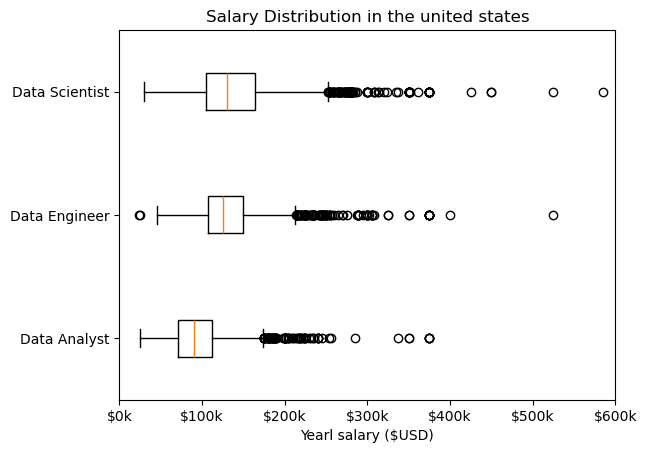

In [24]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']


#Only get Data Anayst jobs in the US
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles, vert=False)
plt.title('Salary Distribution in the united states')
plt.xlabel('Yearl salary ($USD)')
ax =plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.xlim(0, 600000)
plt.show()